# Intro to hist and mplhep

A very quick introduction to hist and mlphep.

1. hist: initialize, fill, and manipulate histograms.
2. mplhep: plot histograms, quickly.

Note you can, and probably should, use matplotlib to plot histograms when mplhep fails you, or you want more control.

The documentations can help you dive deeper:

1. hist: https://hist.readthedocs.io/en/latest/
2. mplhep: https://mplhep.readthedocs.io/en/latest/index.html

In [25]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np

f = uproot.open("tmp/output_xsec_example.root")
print(f.keys())

['p8_ee_Zmumu_ecm91;1', 'p8_ee_Zmumu_ecm91/leps_all_p;1', 'p8_ee_Zmumu_ecm91/leps_all_theta;1', 'p8_ee_Zmumu_ecm91/leps_all_phi;1', 'p8_ee_Zmumu_ecm91/leps_all_q;1', 'p8_ee_Zmumu_ecm91/leps_all_no;1', 'p8_ee_Zmumu_ecm91/m_inv;1', 'p8_ee_Zmumu_ecm91/emiss;1', 'p8_ee_Zmumu_ecm91/meta;1', 'p8_ee_Ztautau_ecm91;1', 'p8_ee_Ztautau_ecm91/leps_all_p;1', 'p8_ee_Ztautau_ecm91/leps_all_theta;1', 'p8_ee_Ztautau_ecm91/leps_all_phi;1', 'p8_ee_Ztautau_ecm91/leps_all_q;1', 'p8_ee_Ztautau_ecm91/leps_all_no;1', 'p8_ee_Ztautau_ecm91/m_inv;1', 'p8_ee_Ztautau_ecm91/emiss;1', 'p8_ee_Ztautau_ecm91/meta;1']


1. Read in the histogram
2. Convert it to a `hist` obejct with `to_hist()`.

In [26]:
h = f['p8_ee_Zmumu_ecm91/leps_all_no'].to_hist()

3. Get the center of each bin, the value of each bin (# events), and the error in each bin (square root of variances)
4. Plot! Use errorbar + step to make it pretty, but feel free to do whatever here

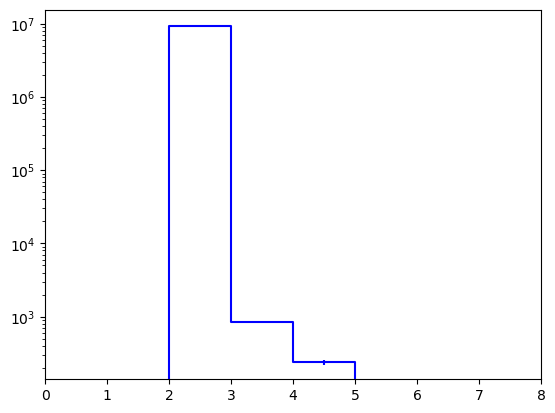

In [27]:
x = h.axes[0].centers
y = h.values()
yerr = np.sqrt(h.variances())

plt.errorbar(x,y, yerr=yerr, 
            fmt="",
            drawstyle="default",
            linestyle="", color='blue')
plt.step(x,y, where='mid', color='blue')
plt.xlim(0,8)
plt.yscale("log")

5. Create a little function `plot()`, which takes as input a histogram object, and plots it, returning the figure and axes.

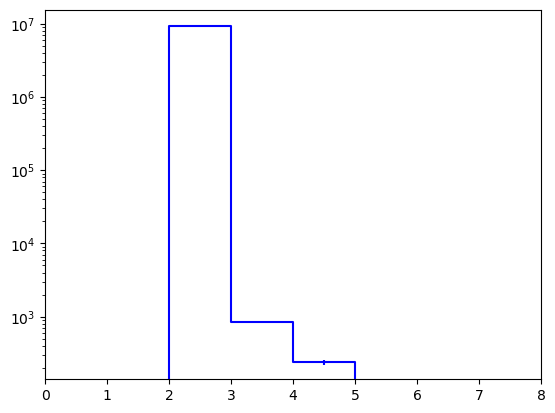

In [28]:
def plot(h):
    fig = plt.figure()
    ax = fig.subplots()
    x = h.axes[0].centers
    y = h.values()
    yerr = np.sqrt(h.variances())
    ax.errorbar(x,y, yerr=yerr, 
                fmt="",
                drawstyle="default",
                linestyle="", color='blue')
    ax.step(x,y, where='mid', color='blue')
    return fig, ax

fig, ax = plot(h)
ax.set_xlim(0,8)
ax.set_yscale("log")

6. Slice the histogram using `indexing`: we cut from the x-values 0 and 2 using `h[0.0j:2.0j]`. This returns a new histogram, which is the old histogram with only bins between 0 and 2. `j` is what tells the indexing program to look at the value of the x axis. If you pass a number without `j`, it will interpret the number as the bin number.

(0.0, 2.0)

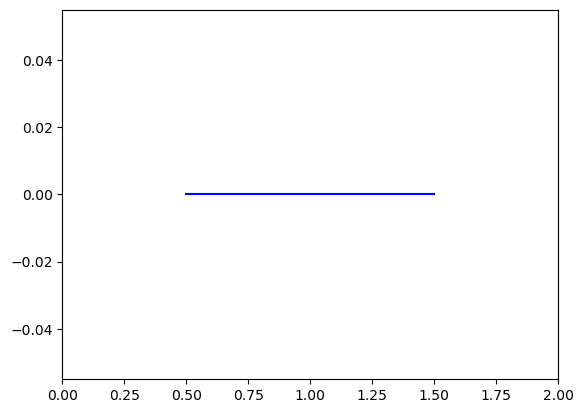

In [29]:
h_cut = h[0.0j:2.0j]
fig, ax = plot(h_cut)
ax.set_xlim(0,2)

6. b. Slicing between 2 and infinity by leaving the upper bound undetermined.

(0.0, 5.0)

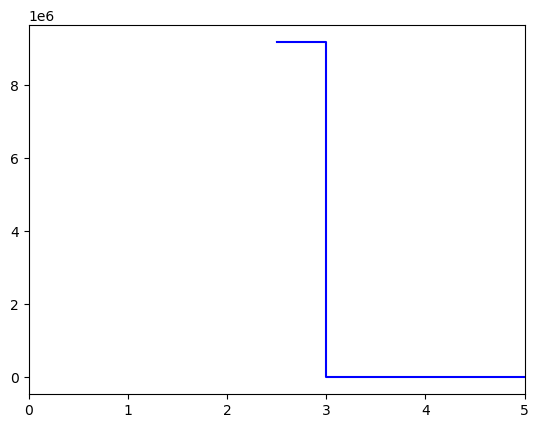

In [30]:
h_cut = h[2.0j:]
fig, ax = plot(h_cut)
ax.set_xlim(0,5)

7. Use `.sum()` to get the weighted sum of a histogram. Note this returns an object containing two values: `.value` and `.variance`.
8. We can slice and sum all in one line, to effectively integrate between two values of the histogram's x-axis.

In [31]:
n_events_total = h.sum()
n_events_2muons = h[2.0j:].sum()
print(n_events_total)
print(n_events_2muons)
print("Ratio of events with at least two muons over all events:",n_events_2muons.value/n_events_total.value)

WeightedSum(value=9.2006e+06, variance=9.2006e+06)
WeightedSum(value=9.2006e+06, variance=9.2006e+06)
Ratio of events with at least two muons over all events: 1.0


9. Rebin every 2 bins (or any other ineteger!) using `h[::2j]`. This, like slicing, returns a new histogram with the rebinning applied. Compare the  rebinned and original histograms.

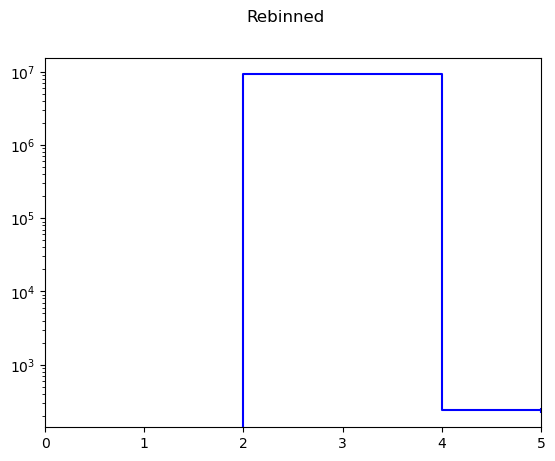

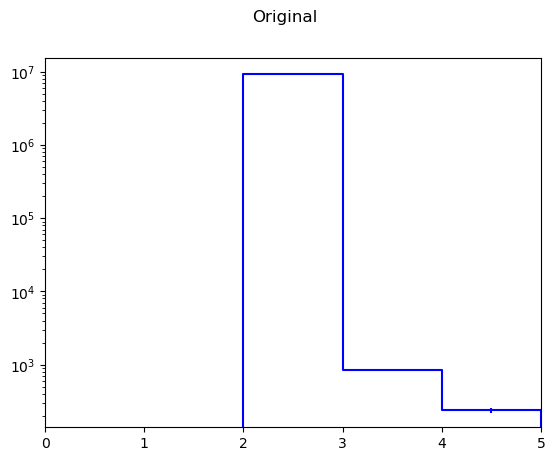

In [32]:
h_rebinned = h[::2j]
fig, ax = plot(h_rebinned)    
ax.set_xlim(0,5)
ax.set_yscale("log")
fig.suptitle("Rebinned")

fig, ax = plot(h)   
fig.suptitle("Original")
ax.set_xlim(0,5)
ax.set_yscale("log")

10. Alright, let's now use `mplhep` to make pretty plots, very quickly, from `hist` objects. We can use `hep.histplot(h)` to achieve this.

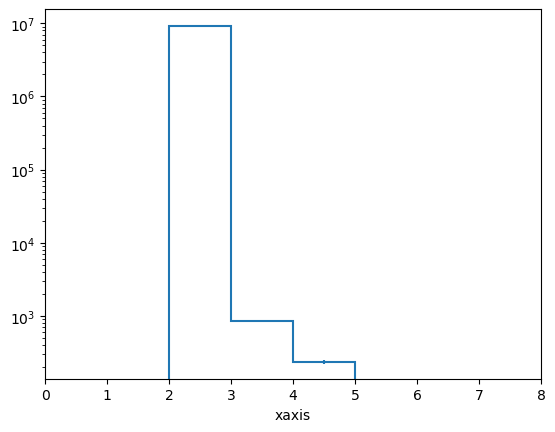

In [33]:
import mplhep as hep      # do you remember how to install a new package?

hep.histplot(h)
plt.xlim(0,8)
plt.yscale("log")

11. Plot several histograms in the same figure by passing a list to `histplot`.

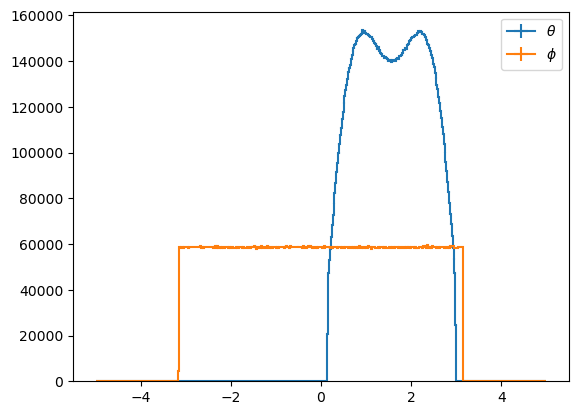

In [34]:
h_theta = f['p8_ee_Zmumu_ecm91/leps_all_theta']
h_phi = f['p8_ee_Zmumu_ecm91/leps_all_phi']
hep.histplot([h_theta,h_phi], label=[r'$\theta$',r'$\phi$'])
plt.legend()

12. Stacked plots are easy too!

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9d29cd1710>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9d29cd97d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

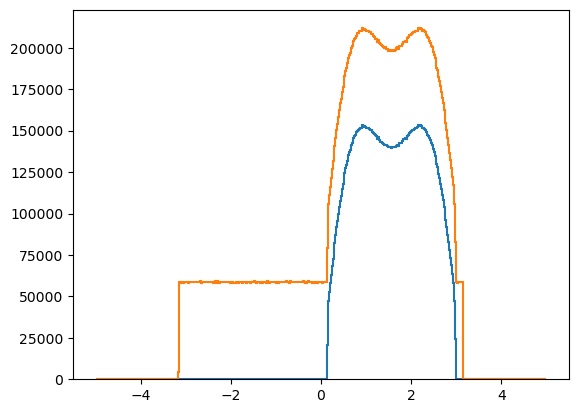

In [35]:
hep.histplot([h_theta,h_phi], stack=True)

13. Initialize a new histogram.
14. Fill it with one event, at value 10. Note the quick visualization tool from hist prints a stilzed histogram to jupyter automatically.

In [36]:
h = Hist.new.Regular(100, 0, 100, name="x").Double()
h.fill(10)

Hist(Regular(100, 0, 100, name='x'), storage=Double()) # Sum: 1.0

15. Fill it with another event, with x value 50. Question: what happens if you run this cell twice? Do you understand why?

In [37]:
h.fill(50)

Hist(Regular(100, 0, 100, name='x'), storage=Double()) # Sum: 2.0

16. Fill it with a list of randomly generated values now.

In [38]:
random_values = np.random.normal(size=10000,loc=50, scale=10)
h.fill(random_values)

Hist(Regular(100, 0, 100, name='x'), storage=Double()) # Sum: 10002.0

Text(0, 0.5, 'Events')

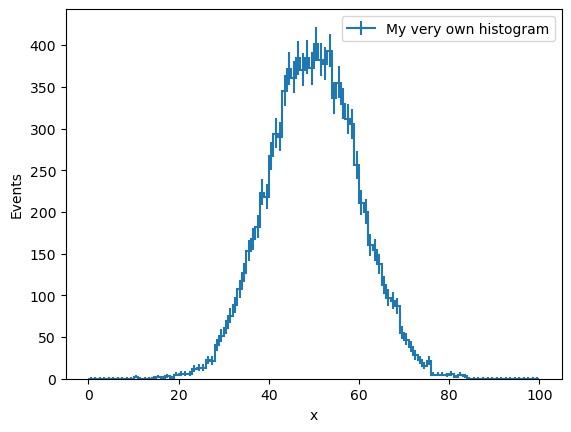

In [39]:
hep.histplot(h, label='My very own histogram')
plt.legend()
plt.ylabel("Events")